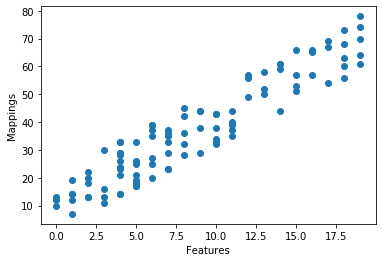

In [2]:
import numpy as np
from matplotlib import pyplot as plt

FRAME_LENGTH = 100

def prepareData(frames):
    return np.random.randint(20, size=frames)

def scatter(X, y):
    plt.scatter(X, y)
    plt.xlabel("Features")
    plt.ylabel("Mappings")
    plt.show()

def plot_fit_line(X, y, y_pred):
    plt.plot(X, y_pred, c="r")
    plt.scatter(X, y, c="b")
    plt.xlabel("Features")
    plt.ylabel("Mapping")
    plt.show()

X = prepareData(FRAME_LENGTH)
y = 2 + 3*X + np.random.randint(20, size=FRAME_LENGTH)

scatter(X, y)



    r:- 0.9424636122256739
    R2:- 0.8842570595346164
    SS_res:- 3803.081537811576
    SS_tot = 32858.00000000001


+----+----+--------------------+
| X  | y  |       y_pred       |
+----+----+--------------------+
| 17 | 54 | 62.96493451626564  |
| 15 | 57 | 56.77144064216327  |
| 5  | 18 | 25.803971271651417 |
| 16 | 65 | 59.86818757921445  |
| 6  | 35 | 28.900718208702603 |
| 19 | 64 |  69.158428390368   |
| 19 | 74 |  69.158428390368   |
| 13 | 58 |  50.5779467680609  |
| 1  | 7  | 13.416983523446676 |
| 4  | 33 | 22.707224334600234 |
| 8  | 32 | 35.09421208280497  |
| 7  | 29 | 31.997465145753786 |
| 1  | 14 | 13.416983523446676 |
| 16 | 57 | 59.86818757921445  |
| 15 | 53 | 56.77144064216327  |
| 6  | 39 | 28.900718208702603 |
| 18 | 73 | 66.06168145331682  |
| 4  | 23 | 22.707224334600234 |
| 2  | 18 | 16.51373046049786  |
| 1  | 12 | 13.416983523446676 |
| 8  | 42 | 35.09421208280497  |
| 10 | 32 | 41.287705956907345 |
| 14 | 44 | 53.67469370511208  |
| 6  | 39 | 28.900718

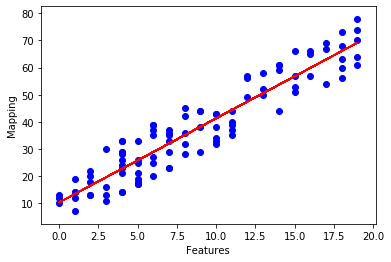

In [3]:
# from tabulate import tabulate
from prettytable import PrettyTable
import random

def getCost(H, y):
    return np.sum((H - y) ** 2)

def sumOfSquares(y1, y2):
    S = 0
    if type(y2) is float:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2) ** 2
            S += diff_square
        return S
    else:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2[i]) ** 2
            S += diff_square
        return S

ø0 = 2 * random.uniform(0, 1) - 1
ø1 = 2 * random.uniform(0, 1) - 1

cycles = 50000
learning_rate = 0.002

m = float(len(X))

for i in range(cycles):
    y_pred = (ø1 * X) + ø0
    dø1 = (-2 / m) * np.sum(X * (y - y_pred))
    dø0 = (-2 / m) * np.sum(y - y_pred)
    ø0 = ø0 - (learning_rate * dø0)
    ø1 = ø1 - (learning_rate * dø1)

y_pred = ø0 + ø1 * X # Prediction after correction of weights
    
y_mean = float(np.mean(y))
X_mean = float(np.mean(X))

SS_res = sumOfSquares(y, y_pred)
SS_tot = sumOfSquares(y, y_mean)

R2 = 1.0 - (SS_res / SS_tot) # R2 (Coefficient of Determination) determined by 1 - (SS_res / SS_tot)

var_X = np.var(X)
var_y = np.var(y)

SS_xy = np.sum((X - X_mean) * (y - y_mean))

r_deg_correlation = SS_xy / (var_X * var_y) # Degree of correlation defined as SS_xy / (var(X) * var(Y))

print('''

    r:- {}
    R2:- {}
    SS_res:- {}
    SS_tot = {}

'''.format(r_deg_correlation, R2, SS_res, SS_tot))

table = PrettyTable(['X', 'y', 'y_pred'])
for i in range(len(X)):
    table.add_row([str(X[i]), str(y[i]), str(y_pred[i])])

print(table)

plot_fit_line(X, y, y_pred)
